This script is to compare baseline solution with our updated solution.

In [1]:
# Set up dataset for sentiment analysis
import spacy
import string
import re
#from spacy.cli import download
#download("en_core_web_sm") # to download english model
import en_core_web_sm
import pandas
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import math
#nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer



    
# Read in data
# Changed encoding="mbcs" to "utf-8" and edited file path for Macs (Meris)
with open("Data/elonmusktwitter.csv", encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    elonmusktwitter_baseline = ""
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            elonmusktwitter_baseline = elonmusktwitter_baseline + " " + row[6]
            line_count += 1
    print(f'Processed {line_count} lines.')
    
with open("Data/twittertakeover.csv", encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    twittertakeover_baseline = ""
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            twittertakeover_baseline = twittertakeover_baseline + " " + row[6]
            line_count += 1
    print(f'Processed {line_count} lines.')
    
with open("Data/ThankYouElonMusk.csv", encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    thankyouelonmusk_baseline = ""
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            thankyouelonmusk_baseline = thankyouelonmusk_baseline + " " + row[5]
            line_count += 1
    print(f'Processed {line_count} lines.')
    
with open("Data/riptwitter.csv", encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    riptwitter_baseline = ""
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            riptwitter_baseline = riptwitter_baseline + " " + row[6]
            line_count += 1
    print(f'Processed {line_count} lines.')
# Run each data file one at a time throught the rest of the script

# Load the core model
nlp = en_core_web_sm.load()


def GetSentimentResults(data):
    data = data[0:99999] # because the limit of nlp() is 100000 characters

    # Remove URLs
    data = re.sub(r"http\S+", "", data, flags=re.MULTILINE)

    # Create list of punctuation to remove
    punctuations = string.punctuation
    # Create list of stopwords from spaCy
    stopwords = spacy.lang.en.stop_words.STOP_WORDS

    def spacy_tokenizer(sentence):
        # Create token object from spacy
        tokens = nlp(sentence)
        # Lemmatize each token and convert each token into lowercase
        tokens = [word.lemma_.strip() if word.lemma_ != "PROPN" else word for word in tokens]
        # Remove stopwords & punctuation
        tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
        # return preprocessed data
        return tokens

    text_tokens = spacy_tokenizer(data)

    # return to string format for sentiment analysis
    text_tokens2 = ' '.join(text_tokens)

    # Rough sentiment analysis
    sid = SentimentIntensityAnalyzer()
    sentiment_results = sid.polarity_scores(text_tokens2)
    
    return sentiment_results

bsln_tt_sentiment = GetSentimentResults(twittertakeover_baseline)
bsln_tyem_sentiment = GetSentimentResults(thankyouelonmusk_baseline)
bsln_ript_sentiment = GetSentimentResults(riptwitter_baseline)
bsln_emt_sentiment = GetSentimentResults(elonmusktwitter_baseline)

Column names are , User, Date Created, Language, Number of Likes, Source of Tweet, Tweet
Processed 10040 lines.
Column names are , User, Date Created, Language, Number of Likes, Source of Tweet, Tweet
Processed 12407 lines.
Column names are , User, Date Created, Number of Likes, Source of Tweet, Tweet
Processed 1262 lines.
Column names are , User, Date Created, Language, Number of Likes, Source of Tweet, Tweet
Processed 8349 lines.


In [2]:
# read in data
elonmusktwitter_updt = pandas.DataFrame(pandas.read_csv("Data/elonmusktwitter.csv"))
riptwitter_updt = pandas.DataFrame(pandas.read_csv("Data/riptwitter.csv"))
thankyouelonmusk_updt = pandas.DataFrame(pandas.read_csv("Data/ThankYouElonMusk.csv"))
twittertakeover_updt = pandas.DataFrame(pandas.read_csv("Data/twittertakeover.csv"))

# Remove bot tweets
not_bot_sources = ["Twitter for iPhone", "Twitter for Android", "Twitter Web App", "Twitter for iPad", 
                   "Flamingo for Android", "Twitterrific for Mac", "Twitterrific for iOS",
                  "Twitter Web Client", "Birdie for Twitter", "tweetcaster for Android", "Twitter Media Studio",
                  "TwitPaine for Android"]

elonmusktwitter_updt = elonmusktwitter_updt[elonmusktwitter_updt['Source of Tweet'].isin(not_bot_sources)]
riptwitter_updt = riptwitter_updt[riptwitter_updt['Source of Tweet'].isin(not_bot_sources)]
thankyouelonmusk_updt = thankyouelonmusk_updt[thankyouelonmusk_updt['Source of Tweet'].isin(not_bot_sources)]
twittertakeover_updt = twittertakeover_updt[twittertakeover_updt['Source of Tweet'].isin(not_bot_sources)]

# Keep only tweet data
elonmusktwitter_updt = elonmusktwitter_updt["Tweet"]
riptwitter_updt = riptwitter_updt["Tweet"]
thankyouelonmusk_updt = thankyouelonmusk_updt["Tweet"]
twittertakeover_updt = twittertakeover_updt["Tweet"]

# Remove URLs, random spaces, and hashtags
elonmusktwitter_updt = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in elonmusktwitter_updt]
elonmusktwitter_updt = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in elonmusktwitter_updt]
elonmusktwitter_updt = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in elonmusktwitter_updt]

riptwitter_updt = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in riptwitter_updt]
riptwitter_updt = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in riptwitter_updt]
riptwitter_updt = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in riptwitter_updt]

thankyouelonmusk_updt = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in thankyouelonmusk_updt]
thankyouelonmusk_updt = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in thankyouelonmusk_updt]
thankyouelonmusk_updt = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in thankyouelonmusk_updt]

twittertakeover_updt = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in twittertakeover_updt]
twittertakeover_updt = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in twittertakeover_updt]
twittertakeover_updt = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in twittertakeover_updt]

sid = SentimentIntensityAnalyzer()

def GetSentiment(data):
    sentiment_test = []
    for tweet in data:
        #text2 = ''.join(str(x) for x in tweet)
        sentiment_test.append(sid.polarity_scores(tweet))
    return sentiment_test


elonmusktwitter_updt_sentiment = GetSentiment(elonmusktwitter_updt)
riptwitter_updt_sentiment = GetSentiment(riptwitter_updt)
thankyouelonmusk_updt_sentiment = GetSentiment(thankyouelonmusk_updt)
twittertakeover_updt_sentiment = GetSentiment(twittertakeover_updt)

In [3]:
# Extract the compount scores and ratios for each tweet form the list of dictionaries for easier comparison
#ElonMuskTwitter
bsln_emt_compound = []
bsln_emt_pos = []
bsln_emt_neg = []
bsln_emt_neu = []
bsln_emt_compound.append(bsln_emt_sentiment["compound"])
bsln_emt_pos.append(bsln_emt_sentiment["pos"])
bsln_emt_neg.append(bsln_emt_sentiment["neg"])
bsln_emt_neu.append(bsln_emt_sentiment["neu"])

updt_emt_compound = []
updt_emt_pos = []
updt_emt_neg = []
updt_emt_neu = []
for tweet in elonmusktwitter_updt_sentiment:
    updt_emt_compound.append(tweet["compound"])
    updt_emt_pos.append(tweet["pos"])
    updt_emt_neg.append(tweet["neg"])
    updt_emt_neu.append(tweet["neu"])

#RIPTwitter
bsln_ript_compound = []
bsln_ript_pos = []
bsln_ript_neg = []
bsln_ript_neu = []
bsln_ript_compound.append(bsln_ript_sentiment["compound"])
bsln_ript_pos.append(bsln_ript_sentiment["pos"])
bsln_ript_neg.append(bsln_ript_sentiment["neg"])
bsln_ript_neu.append(bsln_ript_sentiment["neu"])

updt_ript_compound = []
updt_ript_pos = []
updt_ript_neg = []
updt_ript_neu = []
for tweet in riptwitter_updt_sentiment:
    updt_ript_compound.append(tweet["compound"])
    updt_ript_pos.append(tweet["pos"])
    updt_ript_neg.append(tweet["neg"])
    updt_ript_neu.append(tweet["neu"])
    
#TwitterTakeover
bsln_tt_compound = []
bsln_tt_pos = []
bsln_tt_neg = []
bsln_tt_neu = []
bsln_tt_compound.append(bsln_tt_sentiment["compound"])
bsln_tt_pos.append(bsln_tt_sentiment["pos"])
bsln_tt_neg.append(bsln_tt_sentiment["neg"])
bsln_tt_neu.append(bsln_tt_sentiment["neu"])

updt_tt_compound = []
updt_tt_pos = []
updt_tt_neg = []
updt_tt_neu = []
for tweet in twittertakeover_updt_sentiment:
    updt_tt_compound.append(tweet["compound"])
    updt_tt_pos.append(tweet["pos"])
    updt_tt_neg.append(tweet["neg"])
    updt_tt_neu.append(tweet["neu"])
    
#ThankYouElonMusk
bsln_tyem_compound = []
bsln_tyem_pos = []
bsln_tyem_neg = []
bsln_tyem_neu = []
bsln_tyem_compound.append(bsln_tyem_sentiment["compound"])
bsln_tyem_pos.append(bsln_tyem_sentiment["pos"])
bsln_tyem_neg.append(bsln_tyem_sentiment["neg"])
bsln_tyem_neu.append(bsln_tyem_sentiment["neu"])

updt_tyem_compound = []
updt_tyem_pos = []
updt_tyem_neg = []
updt_tyem_neu = []
for tweet in thankyouelonmusk_updt_sentiment:
    updt_tyem_compound.append(tweet["compound"])
    updt_tyem_pos.append(tweet["pos"])
    updt_tyem_neg.append(tweet["neg"])
    updt_tyem_neu.append(tweet["neu"])

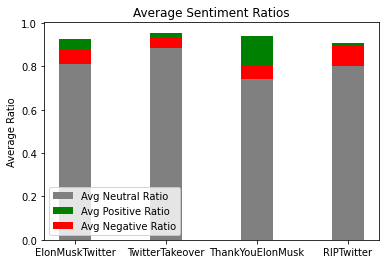

In [4]:
# Stacked bar chart code taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
labels = ['ElonMuskTwitter', 'TwitterTakeover', 'ThankYouElonMusk', 'RIPTwitter']
updt_emt_pos_mean = statistics.mean(updt_emt_pos)
updt_emt_neg_mean = statistics.mean(updt_emt_neg)
updt_emt_neu_mean = statistics.mean(updt_emt_neu)
updt_tt_pos_mean = statistics.mean(updt_tt_pos)
updt_tt_neg_mean = statistics.mean(updt_tt_neg)
updt_tt_neu_mean = statistics.mean(updt_tt_neu)
updt_tyem_pos_mean = statistics.mean(updt_tyem_pos)
updt_tyem_neg_mean = statistics.mean(updt_tyem_neg)
updt_tyem_neu_mean = statistics.mean(updt_tyem_neu)
updt_ript_pos_mean = statistics.mean(updt_ript_pos)
updt_ript_neg_mean = statistics.mean(updt_ript_neg)
updt_ript_neu_mean = statistics.mean(updt_ript_neu)

bsln_emt_pos_mean = statistics.mean(bsln_emt_pos)
bsln_emt_neg_mean = statistics.mean(bsln_emt_neg)
bsln_emt_neu_mean = statistics.mean(bsln_emt_neu)
bsln_tt_pos_mean = statistics.mean(bsln_tt_pos)
bsln_tt_neg_mean = statistics.mean(bsln_tt_neg)
bsln_tt_neu_mean = statistics.mean(bsln_tt_neu)
bsln_tyem_pos_mean = statistics.mean(bsln_tyem_pos)
bsln_tyem_neg_mean = statistics.mean(bsln_tyem_neg)
bsln_tyem_neu_mean = statistics.mean(bsln_tyem_neu)
bsln_ript_pos_mean = statistics.mean(bsln_ript_pos)
bsln_ript_neg_mean = statistics.mean(bsln_ript_neg)
bsln_ript_neu_mean = statistics.mean(bsln_ript_neu)

pos_means = [updt_emt_pos_mean, updt_tt_pos_mean, updt_tyem_pos_mean, updt_ript_pos_mean]
neu_means = [updt_emt_neu_mean, updt_tt_neu_mean, updt_tyem_neu_mean, updt_ript_neu_mean]
neg_means = [updt_emt_neg_mean, updt_tt_neg_mean, updt_tyem_neg_mean, updt_ript_neg_mean]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
ax.bar(labels, neu_means, width, label='Avg Neutral Ratio', color = 'gray')
ax.bar(labels, pos_means, width, label='Avg Positive Ratio', color = 'green', bottom=neu_means)
ax.bar(labels, neg_means, width, bottom=neu_means, label='Avg Negative Ratio', color = 'red')

ax.set_ylabel('Average Ratio')
ax.set_title('Average Sentiment Ratios')
ax.legend()

plt.show()
#fig.savefig('Avg Sentient Ratios by Hashtag.jpg')

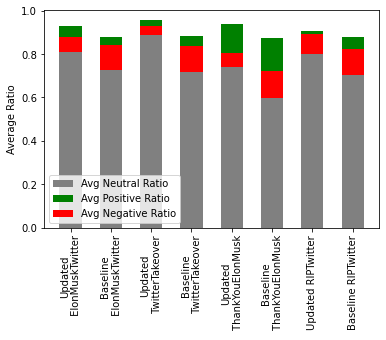

In [5]:
pos_means = [updt_emt_pos_mean, bsln_emt_pos_mean, updt_tt_pos_mean, bsln_tt_pos_mean, updt_tyem_pos_mean, 
             bsln_tyem_pos_mean, updt_ript_pos_mean, bsln_ript_pos_mean]
neu_means = [updt_emt_neu_mean, bsln_emt_neu_mean, updt_tt_neu_mean, bsln_tt_neu_mean, updt_tyem_neu_mean, 
             bsln_tyem_neu_mean, updt_ript_neu_mean, bsln_ript_neu_mean]
neg_means = [updt_emt_neg_mean, bsln_emt_neg_mean, updt_tt_neg_mean, bsln_tt_neg_mean, updt_tyem_neg_mean, 
             bsln_tyem_neg_mean, updt_ript_neg_mean, bsln_ript_neg_mean]
labels = ['Updated\n ElonMuskTwitter', 'Baseline\n ElonMuskTwitter', 'Updated\n TwitterTakeover', 
          'Baseline\n TwitterTakeover', 'Updated\n ThankYouElonMusk', 'Baseline\n ThankYouElonMusk', 
          'Updated RIPTwitter', 'Baseline RIPTwitter']

width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
ax.bar(labels, neu_means, width, label='Avg Neutral Ratio', color = 'gray')
ax.bar(labels, pos_means, width, label='Avg Positive Ratio', color = 'green', bottom=neu_means)
ax.bar(labels, neg_means, width, bottom=neu_means, label='Avg Negative Ratio', color = 'red')

plt.xticks(rotation=90)
ax.set_ylabel('Average Ratio')
ax.set_title('')
ax.legend()

plt.show()
#fig.savefig('Comparison Sentient Ratios by Hashtag Updated v Baseline.jpg', bbox_inches="tight")